In [91]:
import sys
sys.path.append("..") # this adds to path parent directory in order to import utils file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from tqdm import tqdm
import numpy as np
from sklearn import metrics
from IPython.display import clear_output, Image, display
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
import hyperopt
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample
import time
import pickle
import umap
## Import custom utils
import gmm_utils
import hyperopt_utils

In [92]:
%load_ext autoreload
import importlib
importlib.reload(gmm_utils)
importlib.reload(hyperopt_utils)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
elbowAnalysis
silhouetteAnalyis


<module 'hyperopt_utils' from '../hyperopt_utils.py'>

In [24]:
dataset = 'brainCIDR'
df, truth = gmm_utils.loadData(dataset)
umap2D = gmm_utils.getUmap(df, pca_comp = 10)
print(df.shape, truth.shape, truth.clusters.unique())

(420, 22085) (420, 2) [3 4 1 6 2 7 5 0]


In [4]:
params={}
params['dataset'] = 'brainCIDR'
params['minCellsPerGene'] = 0
params['minGeneDispersion'] = 0
params['log'] = True # True, False
params['scaler'] = 'standardScaleCells'# 
params['pca_comp'] = 10 #range (3, 300)
params['nb_clusters'] =8 #3 -15


In [39]:
gmm_utils.run(params);

In [40]:

def runHyperopt(filename, space, max_evals = 2, restart = False):
    # Define function to optimise
    def evaluateGMM(args):
        try:
            resultDict, _ = run(args)
        except:
            return { 'status' : hyperopt.STATUS_FAIL}

        print(f'>> Result: {resultDict["randIndex"]}')
        ret = {
            'loss' : -resultDict['randIndex']
            ,'status' : STATUS_OK
            ,'eval_time' : time.time()        
        }
        return ret

    trials = hyperopt_utils.getTrials(filename ,restart = restart )
    evals_per_epoch = 10
    for e in range(len(trials), max_evals, evals_per_epoch):
        best = fmin(evaluateGMM
                    ,space
                    ,algo=tpe.suggest 
                    ,max_evals= e + evals_per_epoch
                    ,trials=trials)
        print('Index ', e)
        pickle.dump(trials, open(filename, 'wb'))
    return trials

## Brain CIDR

In [43]:
dataset = 'brainCIDR'
space = {
    'dataset' : dataset
    ,'minCellsPerGene':scope.int(hp.quniform('minCellsPerGene', 0, 5, 1))
    ,'minGeneDispersion':hp.uniform('minGeneDispersion', 0, 1.5)
    ,'log' : hp.choice('log', [True,False])
    ,'scaler' : hp.choice('scaler',
            ['none','standardScaleGenes', 'standardScaleCells', 'robustScaleGenes', 'robustScaleCells'])
    ,'pca_comp' : scope.int(hp.quniform('pca_comp', 3, 300,1))
    ,'nb_clusters' : scope.int(hp.quniform('nb_clusters', 3, 15, 1))
}

filename = f'{dataset}_trials.pkl'

In [8]:
trials=hyperopt_utils.getTrials(filename ,restart = False )

Reload trials size :20


In [9]:
trials = runHyperopt(filename, space, max_evals = 100, restart = True);

Creating new trials...
>> Result: 0.35082732980741016


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: -0.0006044891500582812
>> Result: 0.3209402429083666
>> Result: 0.3188538117139711
>> Result: 0.3253229917263729
>> Result: 0.3581864313016431
>> Result: 0.08301568244662404


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6624844807207108
>> Result: 0.2800534556497127


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.48158989260517177
Index  0


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6320874257905943
>> Result: 0.5081103602828704
>> Result: 0.5003191555706101
>> Result: 0.46457196142207197
>> Result: 0.08821912371610315
>> Result: 0.41574746319351014
>> Result: 0.41145622987812586
>> Result: 0.4810544176785772
>> Result: 0.13392528771070342
>> Result: 0.1746664465546778
Index  10


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.4757511399367695


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7118103293397208


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7920281161343883


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.5971915611047145


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6842867156940817


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6065683471788422


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6400799207181236


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.34263487305245716
>> Result: 0.32089084895658476


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7091694655235634
Index  20


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.004627270738322446


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7075494837614587
>> Result: 0.34994426442777016


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: -0.0006044057471758234


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7505021643738843
>> Result: 0.1813578357451911


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6389104801891561
>> Result: 0.3014162522409078


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7984445364781714


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: -0.0004184239286116461
Index  30
>> Result: 0.08142891831085773


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8089833925726242
>> Result: 0.13474296638112732
>> Result: 0.504412075102068


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8427947740954536


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8445399633205335
>> Result: 0.19708998222658947
>> Result: 0.15295568558068723
>> Result: 0.0005816610546502725


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.49419917561141957
Index  40
>> Result: -0.0009847146229883547
>> Result: 0.015766253312178805


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.4474132863307928
>> Result: 0.4327153973543952


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8487336363909159


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6133833040715191


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.001148314149581047
>> Result: 0.19748760380885155


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7240440225140143
>> Result: 0.41266887502228367
Index  50
>> Result: 0.7366859449939582
>> Result: 0.33040295737919956


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7941781144035766


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.0003804027310594333


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7221406737779026


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8427947740954536


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6409061640533145


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7254918739332048


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8758583203453338


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.751488191684649
Index  60


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8758583203453338


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8457548857921522


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6397655395264833
>> Result: 0.08535359454900877
>> Result: 0.397451769596052


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8699666010081872


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.86918692137915
>> Result: 0.1563085654872601
>> Result: 0.8106521519567634


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.0014405787800790969
Index  70


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7838561314212541
>> Result: 0.013106436814120924
>> Result: 0.13162844472866891
>> Result: 0.6136972850411225


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6382264071172667
>> Result: 0.1563085654872601


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.0011135442834914202
>> Result: 0.838244930370083
>> Result: 0.03983486517062794


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.5991154112734427
Index  80
>> Result: 0.1398124017797533


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7257565040508966
>> Result: 0.4891887634934107


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8427947740954536


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.002055819875523398


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.6283295923183272
>> Result: 0.147955444368994


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.7217947683703904
>> Result: 0.26478786300692675


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8704120577142155
Index  90


In [10]:
summaryDf = hyperopt_utils.getResultsAsDf(trials, space)
summaryDf.sort_values(by='result', ascending =True).head()

,dataset,minCellsPerGene,minGeneDispersion,log,scaler,pca_comp,nb_clusters,result
68,brainCIDR,2,1.379438,False,standardScaleCells,239,6,-0.875858
70,brainCIDR,3,1.343503,False,standardScaleCells,242,6,-0.875858
99,brainCIDR,1,1.496641,False,standardScaleCells,172,6,-0.870412
75,brainCIDR,3,1.060447,False,standardScaleCells,241,6,-0.869967
76,brainCIDR,3,1.072604,False,standardScaleCells,240,6,-0.869187


In [13]:
summaryDf.to_pickle(f'{dataset}_df.pkl')

In [62]:
summaryDf = pd.read_pickle(f'{dataset}_df.pkl')
gmm_utils.plotBestPrediction(summaryDf, dataset)

## PancreaticIsletCIDR

In [68]:
dataset= 'pancreaticIsletCIDR'
df, truth = gmm_utils.loadData(dataset)
print(df.shape, truth.shape, truth.clusters.unique())

(60, 180253) (60, 2) [1 3 5 4 0 2]


In [18]:

space = {
    'dataset' : dataset
    ,'minCellsPerGene':scope.int(hp.quniform('minCellsPerGene', 0, 5, 1))
    ,'minGeneDispersion':hp.uniform('minGeneDispersion', 0, 1.5)
    ,'log' : hp.choice('log', [True,False])
    ,'scaler' : hp.choice('scaler',
            ['none','standardScaleGenes', 'standardScaleCells', 'robustScaleGenes', 'robustScaleCells'])
    ,'pca_comp' : scope.int(hp.quniform('pca_comp', 3, 300,1))
    ,'nb_clusters' : scope.int(hp.quniform('nb_clusters', 3, 15, 1))
}

filename = f'{dataset}_trials.pkl'

In [19]:
trials=hyperopt_utils.getTrials(filename ,restart = False )

Creating new trials...


In [20]:
trials = runHyperopt(filename, space, max_evals = 100, restart = True);

Creating new trials...
>> Result: 0.03372232912211411


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Index  0
>> Result: 0.2141949882496927


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Index  10


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.111258282445598
>> Result: -0.006596332393579246


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.006488695300747685
>> Result: 0.4489426170618186
>> Result: 0.01661903852893161
>> Result: 0.21890107112389015
>> Result: 0.23972738524515502
Index  20
>> Result: 0.04038190392201386
>> Result: 0.04438261108534723
>> Result: 0.30149528478698967
>> Result: 0.25370072818023315
Index  30
>> Result: 0.11731306516057319
>> Result: 0.02565814745805913


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.1359857128683401
>> Result: 0.16098271759780144
Index  40


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.03709635409450871
>> Result: 0.22822377495580323


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Index  50
>> Result: 0.17166135716500805
>> Result: 0.24371853185123926
>> Result: 0.14995677746326083
>> Result: 0.3478750674868533
>> Result: 0.33864710898310985
>> Result: -0.01010684529358168
>> Result: 0.017463232327796247
Index  60
>> Result: 0.33547045572691037
>> Result: 0.5502218423732123
>> Result: 0.5226030272227532
>> Result: 0.6879966517541528
>> Result: 0.33173506613228704
>> Result: 0.528855308823981
>> Result: 0.3247923562975584
Index  70


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.9721650846370138


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: Dat

>> Result: 0.9607615862580045


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.02391960622981445


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Index  80


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: Dat

>> Result: 1.0


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.8036483141626973
Index  90


In [21]:
summaryDf = hyperopt_utils.getResultsAsDf(trials, space)
summaryDf.sort_values(by='result', ascending =True).head()

,dataset,minCellsPerGene,minGeneDispersion,log,scaler,pca_comp,nb_clusters,result
96,pancreaticIsletCIDR,5,1.352662,False,standardScaleCells,39,6,-1.000000
80,pancreaticIsletCIDR,0,1.352919,False,standardScaleCells,55,7,-0.972165
84,pancreaticIsletCIDR,4,1.425367,False,standardScaleCells,56,9,-0.960762
98,pancreaticIsletCIDR,5,0.995408,False,standardScaleCells,39,12,-0.803648
75,pancreaticIsletCIDR,1,1.423666,True,standardScaleCells,11,6,-0.687997


In [22]:
summaryDf.to_pickle(f'{dataset}_df.pkl')

/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


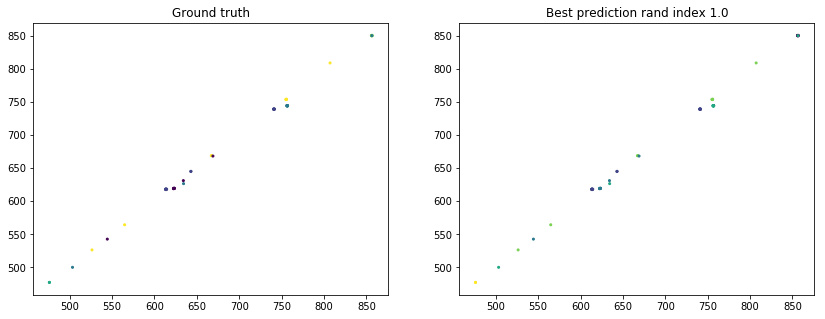

In [93]:
summaryDf = pd.read_pickle(f'{dataset}_df.pkl')
gmm_utils.plotBestPrediction(summaryDf, dataset, pca_comp = 4)

## Deng

In [94]:
dataset= 'deng'
df, truth = gmm_utils.loadData(dataset)
umap2D = gmm_utils.getUmap(df, pca_comp = 10)
print(df.shape, truth.shape, truth.clusters.unique())

(268, 22431) (268, 2) [0 1 2 3 4 5 6 7 8 9]


In [95]:

space = {
    'dataset' : dataset
    ,'minCellsPerGene':scope.int(hp.quniform('minCellsPerGene', 0, 5, 1))
    ,'minGeneDispersion':hp.uniform('minGeneDispersion', 0, 1.5)
    ,'log' : hp.choice('log', [True,False])
    ,'scaler' : hp.choice('scaler',
            ['none','standardScaleGenes', 'standardScaleCells', 'robustScaleGenes', 'robustScaleCells'])
    ,'pca_comp' : scope.int(hp.quniform('pca_comp', 3, 300,1))
    ,'nb_clusters' : scope.int(hp.quniform('nb_clusters', 3, 15, 1))
}

filename = f'{dataset}_trials.pkl'

In [96]:
trials=hyperopt_utils.getTrials(filename ,restart = False )

Creating new trials...


In [ ]:
trials = runHyperopt(filename, space, max_evals = 100, restart = True);

Creating new trials...
>> Result: 0.06328842127388788


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


>> Result: 0.05199554005905589
>> Result: 0.39625474634022956
>> Result: 0.3979453203021136
>> Result: -0.009186997092613473
>> Result: 0.055034988325314206
>> Result: 0.07743756603459145
>> Result: 0.3749320529558263
>> Result: 0.01960964365362832
Index  0


In [10]:
summaryDf = hyperopt_utils.getResultsAsDf(trials, space)
summaryDf.sort_values(by='result', ascending =True).head()

,dataset,minCellsPerGene,minGeneDispersion,log,scaler,pca_comp,nb_clusters,result
68,brainCIDR,2,1.379438,False,standardScaleCells,239,6,-0.875858
70,brainCIDR,3,1.343503,False,standardScaleCells,242,6,-0.875858
99,brainCIDR,1,1.496641,False,standardScaleCells,172,6,-0.870412
75,brainCIDR,3,1.060447,False,standardScaleCells,241,6,-0.869967
76,brainCIDR,3,1.072604,False,standardScaleCells,240,6,-0.869187


In [13]:
summaryDf.to_pickle(f'{dataset}_df.pkl')

In [ ]:
summaryDf = pd.read_pickle(f'{dataset}_df.pkl')
gmm_utils.plotBestPrediction(summaryDf, dataset, pca_comp = 4)

In [ ]:
bestBic, bestAic, bestSil = optimalNbClustersGMM(pc, params['min_clusters'], params['max_clusters'], 2)

In [ ]:
bestBic, bestAic, bestSil

In [ ]:
for n_clust in n_clusters:
    model = GaussianMixture(n_clust, covariance_type ='full', random_state = 0).fit(pc)
    clusters = model.predict(pc)
    score = adjusted_rand_score(truth.clusters.tolist(), clusters)
    print(f"For {n_clust} clusters, score : {score}")

## Evaluation

In [ ]:
model = GaussianMixture(8, covariance_type ='full', random_state = 0).fit(pc)
clusters = model.predict(pc)
score = adjusted_rand_score(truth.clusters.tolist(), clusters)
score

In [ ]:
truth.clusters.value_counts().shape